<a href="https://colab.research.google.com/github/ShounakDas101/multibody/blob/main/flip_mind_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model of mind to be implemented in a Robot

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random as rnd

I = moment of inertia, a = depth of ptential well, w = angular velocity of oscillationg mind, f = is a fraction to modify the potential well, b = damping factor, c = environmental force

for N=8, 5 options are generated in the potential well

k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelvin

T= Social Temperature    # actual value 300K (at room temp)

Therefore, kT=1.38x3=4.14

KE=0.5*I*w2 kinetic energy

U = internal energy

In [ ]:
I=1.0
a=5.0
w2=a/I # it is actually square of angular frequency
f=0.2  # it should be a fraction
b=0.2
c=0.4

N=8
k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelin
T=3    # actual value 300K (at room temp)
KE=0.5*I*w2
U = 15 + KE
print("U", U)

U 17.5


Energy loss due to frictional force:

if b= damping factor, then average energy loss = 1/2 x b x omega_square

Energy gain/loss due to external energy, c:

0.5*I*omega1*omega1 = 0.5*I*omega0*omega0 + c*cos(theta)

Asssuming angular velocity is not varying much

In [ ]:
# Mind Potential Equation biased because of  various brands in the market
omega_square=a/I
print("omega_quare", omega_square)
t = np.arange(-np.pi/2,np.pi/2,0.01)   # start,stop,step
t_max=np.pi/2
# New Potential
H0 = U + a*(1-np.cos(t))
H1 = U + a*(1-np.cos(t)) + f*a*(1-np.cos(N*t))
H2 = U + a*(1-np.cos(t)) + f*a*(1-np.cos(N*t)) - 0.5*b*omega_square
H3 = U + a*(1-np.cos(t)) + f*a*(1-np.cos(N*t)) - 0.5*b*omega_square + 0.5*c*omega_square

# Old Potential
#H1 = U + a*(1-np.cos(t)) + f*a*(1-np.sin(t)*np.cos(N*t))
#H1 = U + a*(1-np.cos(t)) + f*a*(1-np.cos(t)*np.cos(N*t)) - 0.5*b*omega_square
#H2 = U + a*(1-np.cos(t)) + f*a*(1-np.cos(t)*np.cos(N*t)) - 0.5*b*omega_square
#H3 = U + a*(1-np.cos(t)) + f*a*(1-np.cos(t)*np.cos(N*t)) - 0.5*b*omega_square + c*np.cos(t)

omega_quare 5.0


#In the figure
frictional force is dissipative in nature, it reduces the free energy level

external force will add energy to the system, it boosts free energy level for +ve force reduced flipping probability or vice-versa

We are using -ve energy, for demonstration

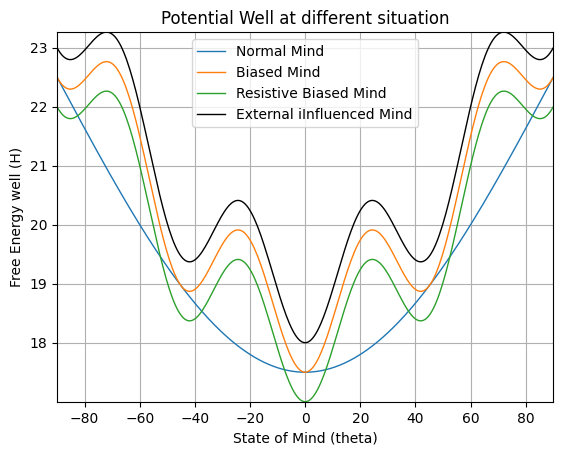

In [ ]:
# A plot of the fluid height (position) inside the straw as a function of time.
#plt.plot(t,y)
# plt.show()
plt.title("Potential Well at different situation")
plt.margins(x=0, y=0)
plt.ticklabel_format(style='plain', axis='x')
plt.plot(t*180/np.pi, H0, t*180/np.pi, H1, t*180/np.pi, H2, t*180/np.pi, H3, 'black', linewidth = 1)
plt.xlabel('State of Mind (theta)')
plt.ylabel('Free Energy well (H)')
plt.legend(['Normal Mind', 'Biased Mind', 'Resistive Biased Mind', 'External iInfluenced Mind'])
plt.grid(True)

# Fig. 1
*Mental Energy as a function of displacement angle. Mind is oscillating inside a brand well, it may flip to other brand by gaining knowledge from information. Blue curve represents the potential well of a healthy unbiased mind. Orange line represents the potential well of a biased mind due to various brands in the market.*

---



Reduce b so that system ocsillates properly, top we have used b=3.5 just to show the graphs properly.

# Ideal Test Energy Output

In [ ]:
I=1.0
a=5.0
w2=a/I # it is actually square of angular frequency
f=0.3  # it should be a fraction
b=0.2
c=2.0

N=8
k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelin
T=3    # actual value 300K (at room temp)
KE=0.5*I*w2
U = 15+KE
Amp=0.5*np.pi - 0.0001
print("angular displacement should not be > pi/2() :",Amp)


angular displacement should not be > pi/2() : 1.5706963267948966


In [ ]:
def test_osc(x,t):
    if   x[0] > 0.5*np.pi:
        x[0]=0.5*np.pi - x[0]
    elif x[0]< -0.5*np.pi:
        x[0]=x[0] - 0.5*np.pi
    return [x[1], -a*x[0] -b*x[1]]

In [ ]:
# Next, we create an array of the desired times for the solution.
no_of_samples = 1700

# Create an empty NumPy array of zeros
time_array = np.zeros(no_of_samples)
posi_array = np.zeros(no_of_samples)  # displacement or position
velo_array = np.zeros(no_of_samples)  # velocity
enrg_array = np.zeros(no_of_samples)  # energy
my_time = [0,1e-2] # odeint takes time in terms of array only, h=t1-t0
theta =Amp
omega =0
init_value =[theta, omega] # odeint takes init_value in terms of array only
for i in range(0,no_of_samples,1):
    my_time = [0,1e-2]
    Hi= 0.5*1*omega*omega + 0.5*a*theta*theta - 0.5*b*omega*omega # 0.5*I*omega^2 + 0.5*k*theta^2 -0.5*b*omega^2
    enrg_array[i]=Hi
    # Calculate the average of the last 5 elements
    # last_five_average = np.mean(enrg_array[-5:])
    solution = odeint(test_osc, init_value, my_time)
    time_array[i]=i*1e-2
    posi_array[i]=solution[1,0]
    velo_array[i]=solution[1,1]
    # Now calculate the free energy Hi
    theta=posi_array[i]
    omega=velo_array[i]
    init_value = [theta, omega]

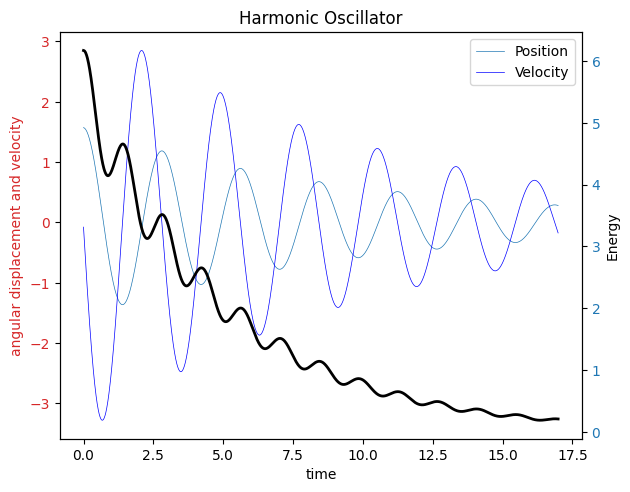

In [ ]:
from matplotlib import colors
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('angular displacement and velocity', color=color)
ax1.plot(time_array, posi_array, time_array, velo_array,  'blue', linewidth = 0.5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Position', 'Velocity'])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Energy', color='black')  # we already handled the x-label with ax1
ax2.plot(time_array, enrg_array, color='black',linewidth = 2.0)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.legend(['Energy'])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Harmonic Oscillator")
plt.show()

# Fig 2
Harmonic oscillator with damping. The energy decays with time.

# Coupled Oscillator OUTPUT

In [ ]:
def coupled_osc(x, t):
    if   x[0] > 0.5*np.pi:
        x[0]=0.5*np.pi - x[0] # oscillate between -pi/2 to +pi/2
    elif x[0]< -0.5*np.pi:
        x[0]=x[0] - 0.5*np.pi # oscillate between -pi/2 to +pi/2

    return  [x[1], -a*np.sin(x[0]) -b*x[1]  - f*a*np.sin(N*x[0])]

In [ ]:
I=1.0
a=5.0
w2=a/I # it is actually square of angular frequency
f=0.1  # it should be a fraction
b=0.1
c=2.0

N=8
k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelin
T=3    # actual value 300K (at room temp)
KE=0.5*I*w2
U = 15+KE
theta=45*np.pi/180
omega = 0
print("angular displacement should not be > pi/2() :",theta)
energy_value= U + 0.5*I*omega*omega + a*(1-np.cos(theta)) +  f*a*(1-np.cos(N*theta)) - 0.5*b*omega*omega
print("energy :", energy_value )

angular displacement should not be > pi/2() : 0.7853981633974483
energy : 18.964466094067262


In [ ]:
# Next, we create an array of the desired times for the solution.
no_of_samples = 3000
# Create an empty NumPy array of zeros
time_array = np.zeros(no_of_samples)
posi_array = np.zeros(no_of_samples)
velo_array = np.zeros(no_of_samples)
enrg_array = np.zeros(no_of_samples)  # energy
my_time = [0,1e-2] # odeint takes time in terms of array only, h=t1-t0
init_value =[theta,0] # odeint takes init_value in terms of array only
for i in range(0,no_of_samples,1):
    my_time = [0,1e-2]
    enrg_array[i]= U + 0.5*I*omega*omega + a*(1-np.cos(theta)) +  f*a*(1-np.cos(N*theta)) - 0.5*b*omega*omega
    solution = odeint(coupled_osc, init_value, my_time)
    time_array[i]=i*1e-2
    posi_array[i]=solution[1,0]
    velo_array[i]=solution[1,1]
    theta=posi_array[i]
    omega=velo_array[i]
    init_value = [theta, omega]
    #print (i*my_time[1], solution[1,0], solution[1,1])
print ("theta", theta)
#print(posi_array)
# A plot of the fluid height (position) inside the straw as a function of time.
# plt.plot(time_array, posi_array,time_array, velo_array,time_array, enrg_array, 'red', linewidth = 1)
# plt.xlabel('time (s)')
# plt.ylabel('position (cm)')
# plt.legend(['angular displacement', 'angular velocity', 'Energy'])
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.grid(True)

theta -0.002452572568436516


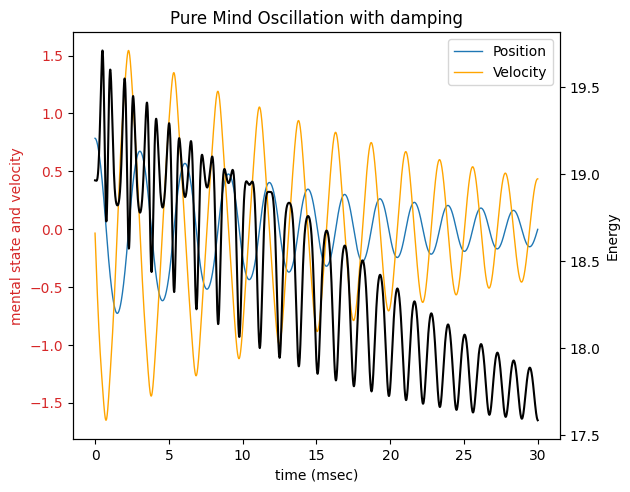

In [ ]:
from matplotlib import colors
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (msec)')
ax1.set_ylabel('mental state and velocity', color=color)
ax1.plot(time_array, posi_array, time_array, velo_array,  'orange', linewidth = 1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Position', 'Velocity'])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Energy', color='black')  # we already handled the x-label with ax1
ax2.plot(time_array, enrg_array, color='black')
ax2.tick_params(axis='y', labelcolor='black')
#ax2.legend(['Mental Energy'])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Pure Mind Oscillation with damping")
plt.show()

# Fig 3

# Flip Oscillator OUTPUT

In [ ]:
def flip_osc(x, t):
    if   x[0] > 0.5*np.pi:
        x[0]=0.5*np.pi - x[0] # oscillate between -pi/2 to +pi/2
    elif x[0]< -0.5*np.pi:
        x[0]=x[0] - 0.5*np.pi # oscillate between -pi/2 to +pi/2
    return  [x[1], -a*np.sin(x[0]) -b*x[1] - f*a*np.sin(N*x[0]) + c*np.sin(x[0])]

In [ ]:
I=1.0
a=5.0
w2=a/I # it is actually square of angular frequency
f=0.3  # it should be a fraction
b=0.75
c=3.0

N=8
k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelin
T=3    # actual value 300K (at room temp)
KE=0.5*I*w2
U = 15
theta=0.5*np.pi - 0.0001
energy_value=U + 0.5*I*omega*omega + a*(1-np.cos(theta))+ f*a*(1-np.cos(N*theta))- 0.5*b*omega*omega + c*np.cos(omega)
print("theta and energy :",Amp,energy_value)

theta and energy : 1.5706963267948966 22.74425660689342


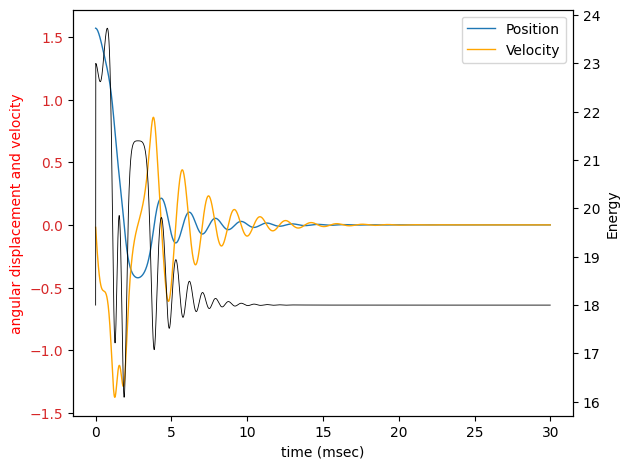

In [ ]:
# Next, we create an array of the desired times for the solution.
no_of_samples = 3000
# Create an empty NumPy array of zeros
time_array = np.zeros(no_of_samples)
posi_array = np.zeros(no_of_samples)
velo_array = np.zeros(no_of_samples)
enrg_array = np.zeros(no_of_samples)  # energy
my_time = [0,1e-2] # odeint takes time in terms of array only, h=t1-t0
init_value =[Amp,0] # odeint takes init_value in terms of array only
for i in range(0,no_of_samples,1):
    my_time = [0,1e-2]
    enrg_array[i]= U + 0.5*I*omega*omega + a*(1-np.cos(theta))+ f*a*(1-np.cos(N*theta))- 0.5*b*omega*omega + c*np.cos(omega)
    solution = odeint(flip_osc, init_value, my_time)
    time_array[i]=i*1e-2
    posi_array[i]=solution[1,0]
    velo_array[i]=solution[1,1]
    theta=posi_array[i]
    omega=velo_array[i]
    init_value =theta, omega
    #print (i*my_time[1], solution[1,0], solution[1,1])

from matplotlib import colors
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (msec)')
ax1.set_ylabel('angular displacement and velocity', color='red')
ax1.plot(time_array, posi_array, time_array, velo_array,  'orange', linewidth = 1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Position', 'Velocity'])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Energy', color='black')  # we already handled the x-label with ax1
ax2.plot(time_array, enrg_array, color='black', linewidth = 0.6)
ax2.tick_params(axis='y', labelcolor='black')
#ax2.legend(['Energy'])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Fig 4

# Velocity dependent knowledge gain with damping

In [ ]:
I=1.0
a=5.0
w2=a/I # it is actually square of angular frequency
f=0.3  # it should be a fraction
b=0.1
c=0.5

N=8
k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelin
T=3    # actual value 300K (at room temp)
KE=0.5*I*w2
U = 15
theta=0.5*np.pi - 0.0001
energy_value=U + 0.5*I*omega*omega + a*(1-np.cos(theta))+ f*a*(1-np.cos(N*theta))- 0.5*b*omega*omega + 0.5*c*omega*omega
print("theta and energy :",Amp,energy_value)

theta and energy : 1.5706963267948966 20.211513835421055


In [ ]:
# Mind Potential Equation biased because of  various brands in the market
omega_square=a/I
t = np.arange(-np.pi/2,np.pi/2,0.05)   # start,stop,step
t_max=np.pi/2
# New Potential
H0 = U + a*(1-np.cos(t))
H1 = U + a*(1-np.cos(t)) + f*a*(1-np.cos(N*t))
H2 = U + a*(1-np.cos(t)) + f*a*(1-np.cos(N*t)) - 0.5*b*omega_square
H3 = U + a*(1-np.cos(t)) + f*a*(1-np.cos(N*t)) - 0.5*b*omega_square +  0.5*c*omega_square

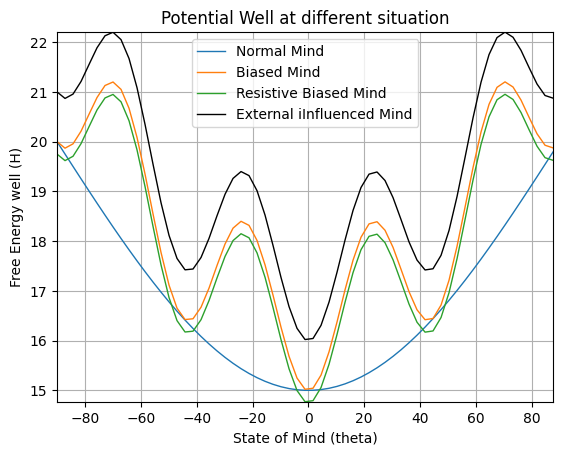

In [ ]:
# A plot of the fluid height (position) inside the straw as a function of time.
#plt.plot(t,y)
# plt.show()
plt.title("Potential Well at different situation")
plt.margins(x=0, y=0)
plt.ticklabel_format(style='plain', axis='x')
plt.plot(t*180/np.pi, H0, t*180/np.pi, H1, t*180/np.pi, H2, t*180/np.pi, H3, 'black', linewidth = 1)
plt.xlabel('State of Mind (theta)')
plt.ylabel('Free Energy well (H)')
plt.legend(['Normal Mind', 'Biased Mind', 'Resistive Biased Mind', 'External iInfluenced Mind'])
plt.grid(True)

In [ ]:
def flip_osc(x, t):
    if   x[0] > 0.5*np.pi:
        x[0]=0.5*np.pi - x[0] # oscillate between -pi/2 to +pi/2
    elif x[0]< -0.5*np.pi:
        x[0]=x[0] - 0.5*np.pi # oscillate between -pi/2 to +pi/2
    return  [x[1], -a*np.sin(x[0]) -b*x[1] - f*a*np.sin(N*x[0]) + c*x[1] ]

In [ ]:
def coupled_osc(x, t):
    if   x[0] > 0.5*np.pi:
        x[0]=0.5*np.pi - x[0] # oscillate between -pi/2 to +pi/2
    elif x[0]< -0.5*np.pi:
        x[0]=x[0] - 0.5*np.pi # oscillate between -pi/2 to +pi/2

    return  [x[1], -a*np.sin(x[0]) -b*x[1]  - f*a*np.sin(N*x[0])]

In [ ]:
# Next, we create an array of the desired times for the solution.
no_of_samples = 12000
tou_0=100
delay = 4
# Create an empty NumPy array of zeros
time_array = np.zeros(no_of_samples)
posi_array = np.zeros(no_of_samples)  # displacement or position
velo_array = np.zeros(no_of_samples)  # velocity
enrg_array = np.zeros(no_of_samples)  # energy
mean_array = np.zeros(no_of_samples)  # mean enegy
tou_array  = np.ones(no_of_samples)  # tou
my_time = [0,1e-2] # odeint takes time in terms of array only, h=t1-t0
theta = Amp #np.pi/2
omega =0
init_value =[theta, omega] # odeint takes init_value in terms of array only
for i in range(0,no_of_samples,1):

    #tou_array[i] = tou_0*np.exp(enrg_array[i]/300)
    # Calculate the average of the last 150 elements
    if i<2000:
        mean_array[i] = enrg_array[i]
    else :
        mean_array[i] = np.mean(enrg_array[i-2000:i])
    # check tou
    if  15<mean_array[i]<17 or delay> tou_0 > 0     :  # here condition should be mean_array[i]/kT <1
            #tou_array[i] = tou_0*np.exp(mean_array[i]/300)
            c = 0.21       #2*rnd.random()

            # Now calculate the free energy Hi
            enrg_array[i]= U + 0.5*I*omega*omega + a*(1-np.cos(theta))+ f*a*(1-np.cos(N*theta))- 0.5*b*omega*omega + 0.5*c*omega*omega

            #omega1=omega - c*np.sin(theta)*1e-2
            #theta1=theta + omega1*1e-2
            #omega1 =  np.sqrt(2*c*np.cos(theta)/(I-b) + omega*omega) # energy injected to the system is converted to KE in the system
            #theta1 =  theta+5*np.pi/180   #theta + omega*1e-2
            #init_value =[theta, omega]
            solution = odeint(flip_osc, init_value, my_time)
            posi_array[i]=solution[1,0]
            velo_array[i]=solution[1,1]
            theta=posi_array[i]
            omega=velo_array[i]
            init_value=[theta, omega]

            tou_0 = tou_0 -1
            #print("flip",tou_array[i])
    else:
            # Now calculate the free energy Hi
            #tou_array[i] = tou_0*np.exp(mean_array[i]/300)
            enrg_array[i]=U + 0.5*I*omega*omega + a*(1-np.cos(theta))+ f*a*(1-np.cos(N*theta))- 0.5*b*omega*omega
            solution = odeint(coupled_osc, init_value, my_time)
            posi_array[i]=solution[1,0]
            velo_array[i]=solution[1,1]
            theta=posi_array[i]
            omega=velo_array[i]
            init_value=[theta, omega]

            tou_0 = delay
            #print("coupled" , tou_array[i])

    time_array[i]=i*1e-2


    #print (last_five_average,theta,omega)



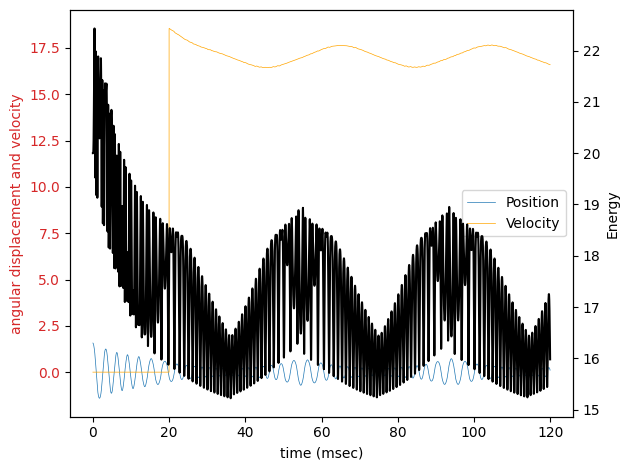

In [ ]:
from matplotlib import colors
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (msec)')
ax1.set_ylabel('angular displacement and velocity', color=color)
ax1.plot(time_array, posi_array, time_array, mean_array,  'orange', linewidth = 0.5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Position', 'Velocity'])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Energy', color='black')  # we already handled the x-label with ax1
ax2.plot(time_array, enrg_array, color='black')
ax2.tick_params(axis='y', labelcolor='black')
#ax2.legend(['Energy'])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Final Model Simulation

In [ ]:
I=1.0
a=5.0
b=0.5
c=0.6
f=0.3  # it should be a fraction
w2=a/I # it is actually square of angular frequency



N=8 # No of anaisotropy in the potential well = 1+N/2
k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelin
T=20    # actual value 300K (at room temp)
KE=0.5*I*w2
U = 15
Amp = 1.3

In [ ]:
# Mind Potential Equation biased because of  various brands in the market
omega_square=a/I
t = np.arange(-np.pi/2,np.pi/2,0.05)   # start,stop,step
t_max=np.pi/2
# New Potential
H0 = U + a*(1-np.cos(t))
H1 = U + a*(1-np.cos(t)) + f*a*(1-np.cos(N*t))
H2 = U + a*(1-np.cos(t)) + f*a*(1-np.cos(N*t)) - 0.5*b*omega_square
H3 = U + a*(1-np.cos(t)) + f*a*(1-np.cos(N*t)) - 0.5*b*omega_square + c*np.cos(t)

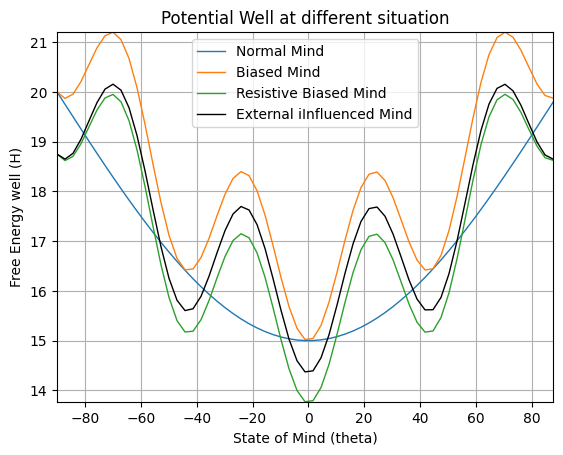

In [ ]:
# A plot of the fluid height (position) inside the straw as a function of time.
#plt.plot(t,y)
# plt.show()
plt.title("Potential Well at different situation")
plt.margins(x=0, y=0)
plt.ticklabel_format(style='plain', axis='x')
plt.plot(t*180/np.pi, H0, t*180/np.pi, H1, t*180/np.pi, H2, t*180/np.pi, H3, 'black', linewidth = 1)
plt.xlabel('State of Mind (theta)')
plt.ylabel('Free Energy well (H)')
plt.legend(['Normal Mind', 'Biased Mind', 'Resistive Biased Mind', 'External iInfluenced Mind'])
plt.grid(True)

In [ ]:
# Next, we create an array of the desired times for the solution.
no_of_samples = 12000
tou_0=100
delay =5
# Create an empty NumPy array of zeros
time_array = np.zeros(no_of_samples)
posi_array = np.zeros(no_of_samples)  # displacement or position
velo_array = np.zeros(no_of_samples)  # velocity
enrg_array = np.zeros(no_of_samples)  # energy
mean_array = np.zeros(no_of_samples)  # mean enegy
tou_array  = np.ones(no_of_samples)  # tou
my_time = [0,1e-2] # odeint takes time in terms of array only, h=t1-t0
theta = 0.5*np.pi/2
omega =0
init_value =[theta, omega] # odeint takes init_value in terms of array only
for i in range(0,no_of_samples,1):

    #tou_array[i] = tou_0*np.exp(enrg_array[i]/300)
    # Calculate the average of the last 150 elements
    if i<1500:
        mean_array[i] = enrg_array[i]
    else :
        mean_array[i] = np.mean(enrg_array[i-1500:i])
    # check tou
    if  15.0<mean_array[i]<15.5 or delay> tou_0 > 0     :  # here condition should be mean_array[i]/kT <1
            #tou_array[i] = tou_0*np.exp(mean_array[i]/300)
            #c = 0.321       #2*rnd.random()

            # Now calculate the free energy Hi
            enrg_array[i]= U + 0.5*I*omega*omega + a*(1-np.cos(theta))+ f*a*(1-np.cos(N*theta))- 0.5*b*omega*omega + c*np.cos(theta)

            #omega1=omega + c*np.sin(theta)*1e-2/I-b
            #theta1=theta + omega*1e-2
            #omega1 =  np.sqrt(2*c*np.cos(theta)/(I-b) + omega*omega) # energy injected to the system is converted to KE in the system
            #theta1 = theta + omega*1e-2
            #init_value =[theta, omega]
            solution = odeint(flip_osc, init_value, my_time)
            posi_array[i]=solution[1,0]
            velo_array[i]=solution[1,1]
            theta=posi_array[i]
            omega=velo_array[i]
            init_value=[theta, omega]

            tou_0 = tou_0 -1
            #print("flip",tou_array[i])
    else:
            # Now calculate the free energy Hi
            #tou_array[i] = tou_0*np.exp(mean_array[i]/300)
            enrg_array[i]=U + 0.5*I*omega*omega + a*(1-np.cos(theta))+ f*a*(1-np.cos(N*theta))- 0.5*b*omega*omega
            solution = odeint(coupled_osc, init_value, my_time)
            posi_array[i]=solution[1,0]
            velo_array[i]=solution[1,1]
            theta=posi_array[i]
            omega=velo_array[i]
            init_value=[theta, omega]

            tou_0 = delay
            #print("coupled" , tou_array[i])

    time_array[i]=i*1e-2


    #print (last_five_average,theta,omega)



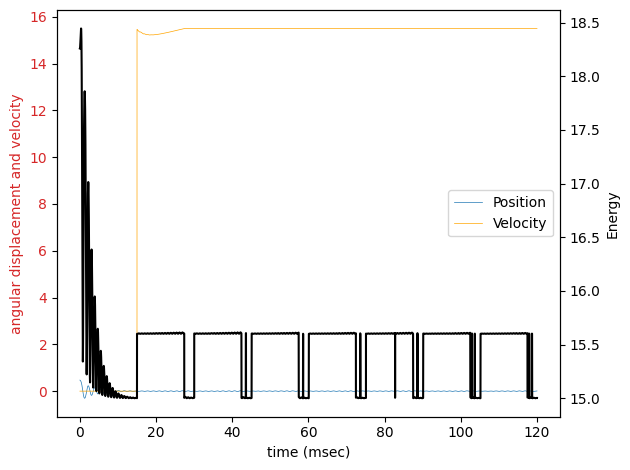

In [ ]:
from matplotlib import colors
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (msec)')
ax1.set_ylabel('angular displacement and velocity', color=color)
ax1.plot(time_array, posi_array, time_array, mean_array,  'orange', linewidth = 0.5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Position', 'Velocity'])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Energy', color='black')  # we already handled the x-label with ax1
ax2.plot(time_array, enrg_array, color='black')
ax2.tick_params(axis='y', labelcolor='black')
#ax2.legend(['Energy'])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Fig. 5

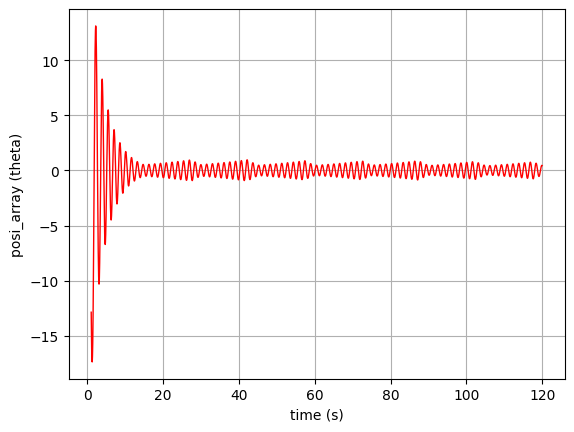

In [ ]:
# A plot of the fluid height (position) inside the straw as a function of time.
plt.plot(time_array[100:12000], 180*posi_array[100:12000]/np.pi,'red', linewidth = 1)
plt.xlabel('time (s)')
plt.ylabel('posi_array (theta)')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.grid(True)

# Fig. 6

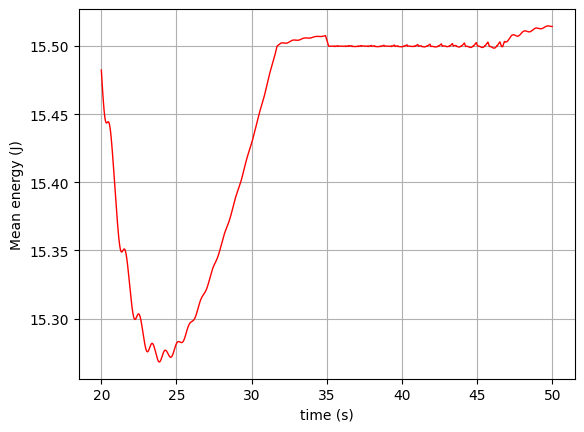

In [ ]:
# A plot of the fluid height (position) inside the straw as a function of time.
plt.plot(time_array[2000:12000], mean_array[2000:12000],'red', linewidth = 1)
plt.xlabel('time (s)')
plt.ylabel('Mean energy (J)')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.grid(True)

In [ ]:
print(tou_array[100])

1.0
